In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Generate some toy user and movie data

# Number of users
n_users = 100

# Number of movies
n_movies = 10

# Number of ratings
n_ratings = 1000

# Generate random user ids
user_ids = np.random.randint(0, n_users, n_ratings)

# Generate random movie ids
movie_ids = np.random.randint(0, n_movies, n_ratings)

# Generate random ratings
ratings = np.random.randint(1, 6, n_ratings)

# Create a dataframe with the data
df = pd.DataFrame({'user_id': user_ids, 'movie_id': movie_ids, 'rating': ratings})

# We should not have any duplicate ratings for the same user and movie
# Drop any rows that have duplicate user_id and movie_id pairs
df = df.drop_duplicates(['user_id', 'movie_id'])


In [3]:
df

,user_id,movie_id,rating
0,66,7,2
1,54,7,4
2,38,5,3
3,56,6,1
4,4,0,4
...,...,...,...
987,77,8,3
992,99,3,3
994,8,5,3
998,22,2,3


In [4]:
# Create a user-item matrix

A = df.pivot(index='user_id', columns='movie_id', values='rating')
A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,3.0,4.0,NaN,5.0,5.0,1.0,2.0,5.0,2.0,4.0
1,4.0,2.0,NaN,1.0,NaN,3.0,3.0,5.0,3.0,1.0
2,3.0,NaN,NaN,4.0,1.0,5.0,NaN,2.0,NaN,2.0
3,4.0,NaN,4.0,2.0,NaN,3.0,NaN,2.0,NaN,4.0
4,4.0,3.0,3.0,3.0,NaN,NaN,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,1.0,3.0,1.0,2.0,3.0,NaN,1.0,NaN,5.0,NaN
96,1.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0,2.0,5.0
97,3.0,1.0,4.0,NaN,3.0,1.0,NaN,NaN,5.0,NaN


In [5]:
# Fill in the missing values with zeros
A = A.fillna(0)

A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,3.0,4.0,0.0,5.0,5.0,1.0,2.0,5.0,2.0,4.0
1,4.0,2.0,0.0,1.0,0.0,3.0,3.0,5.0,3.0,1.0
2,3.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,0.0,2.0
3,4.0,0.0,4.0,2.0,0.0,3.0,0.0,2.0,0.0,4.0
4,4.0,3.0,3.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,1.0,3.0,1.0,2.0,3.0,0.0,1.0,0.0,5.0,0.0
96,1.0,2.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0
97,3.0,1.0,4.0,0.0,3.0,1.0,0.0,0.0,5.0,0.0


In [6]:
# Cosine similarity between U1 and U2

# User 1
u1 = A.loc[0]

# User 2
u2 = A.loc[1]

# Compute the dot product
dot = np.dot(u1, u2)

# Compute the L2 norm
norm_u1 = np.linalg.norm(u1)
norm_u2 = np.linalg.norm(u2)

# Compute the cosine similarity
cos_sim = dot / (norm_u1 * norm_u2)
cos_sim

0.7174278379758501

In [7]:
# Calculate the cosine similarity between users
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(A)

pd.DataFrame(sim_matrix)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.717428,0.663734,0.565794,0.547289,0.742468,0.539472,0.599021,0.748964,0.523832,...,0.876593,0.593722,0.615664,0.722496,0.783190,0.657754,0.665375,0.446627,0.774667,0.703313
1,0.717428,1.000000,0.650769,0.591169,0.559964,0.585314,0.300491,0.255039,0.693395,0.500193,...,0.609392,0.313893,0.510454,0.550459,0.624622,0.493197,0.644346,0.476288,0.802740,0.781611
2,0.663734,0.650769,1.000000,0.758954,0.406780,0.372046,0.416654,0.270593,0.746685,0.560180,...,0.519274,0.322243,0.772529,0.253842,0.712485,0.257761,0.322830,0.283373,0.441886,0.459929
3,0.565794,0.591169,0.758954,1.000000,0.549030,0.540128,0.671775,0.572892,0.611794,0.489225,...,0.424052,0.586110,0.456327,0.506719,0.715831,0.210494,0.506585,0.492312,0.551652,0.424052
4,0.547289,0.559964,0.406780,0.549030,1.000000,0.354329,0.304478,0.541185,0.821353,0.202287,...,0.667638,0.527306,0.339913,0.435159,0.582943,0.478699,0.417780,0.450063,0.502836,0.741820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.657754,0.493197,0.257761,0.210494,0.478699,0.519615,0.452602,0.571548,0.551553,0.405674,...,0.564076,0.556890,0.604211,0.682793,0.661382,1.000000,0.412568,0.796715,0.678637,0.693008
96,0.665375,0.644346,0.322830,0.506585,0.417780,0.853538,0.359095,0.538977,0.351369,0.191776,...,0.498686,0.640033,0.190421,0.690704,0.682163,0.412568,1.000000,0.280141,0.734105,0.581800
97,0.446627,0.476288,0.283373,0.492312,0.450063,0.400743,0.709211,0.532239,0.469979,0.566223,...,0.262641,0.446564,0.501441,0.689500,0.637007,0.796715,0.280141,1.000000,0.659366,0.481508
98,0.774667,0.802740,0.441886,0.551652,0.502836,0.844146,0.446610,0.473016,0.617575,0.335738,...,0.546861,0.500390,0.305585,0.673754,0.687116,0.678637,0.734105,0.659366,1.000000,0.600213


<AxesSubplot:>

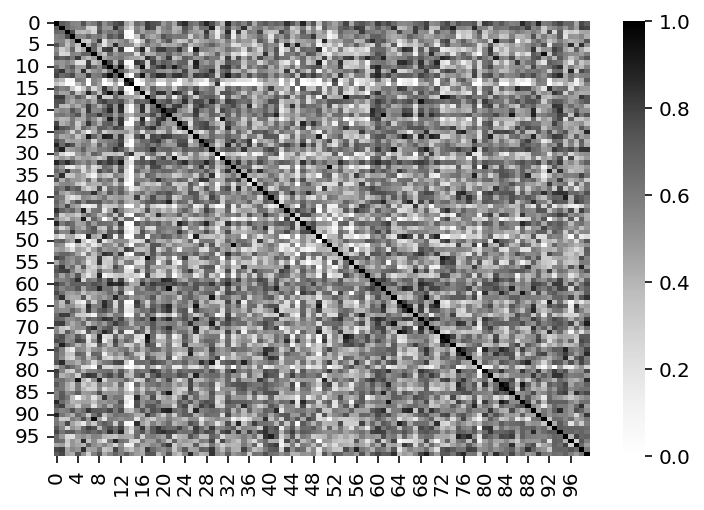

In [8]:
import seaborn as sns

sns.heatmap(sim_matrix, cmap='Greys')


In [9]:
# Find the most similar users to user u 

def k_nearest_neighbors(A, u, k):
    """Find the k nearest neighbors for user u"""
    # Find the index of the user in the matrix
    u_index = A.index.get_loc(u)
    
    # Compute the similarity between the user and all other users
    sim_matrix = cosine_similarity(A)

    # Find the k most similar users
    k_nearest = np.argsort(sim_matrix[u_index])[::-1][1:k+1]
    
    # Return the user ids
    return A.index[k_nearest]

In [10]:
k_nearest_neighbors(A, 0, 5)

Int64Index([28, 46, 90, 32, 87], dtype='int64', name='user_id')

In [11]:
# Show matrix of movie ratings for u and k nearest neighbors

def show_neighbors(A, u, k):
    """Show the movie ratings for user u and k nearest neighbors"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Return the dataframe
    return df

In [12]:
show_neighbors(A, 0, 5)

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,3.0,4.0,0.0,5.0,5.0,1.0,2.0,5.0,2.0,4.0
28,5.0,0.0,0.0,5.0,4.0,2.0,1.0,4.0,0.0,5.0
46,3.0,0.0,2.0,5.0,5.0,1.0,0.0,4.0,2.0,2.0
90,1.0,5.0,1.0,5.0,2.0,0.0,2.0,4.0,0.0,1.0
32,3.0,2.0,2.0,5.0,4.0,5.0,3.0,5.0,0.0,3.0
87,1.0,0.0,0.0,5.0,4.0,0.0,3.0,4.0,4.0,2.0


In [13]:
# Rating for user u for movie 0 is: (4.0 + 3.0) / 2 = 3.5 (Discard 0s)

def predict_rating(A, u, m, k=5):
    """Predict the rating for user u for movie m"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Get the ratings for movie m
    ratings = df[m]
    
    # Calculate the mean of the ratings
    mean = ratings[1:][ratings != 0].mean()
    
    # Return the mean
    return mean

In [14]:
predict_rating(A, 0, 5)

2.6666666666666665

In [15]:
# Now working with real data

# Load the data

df = pd.read_excel("mov-rec.xlsx")
df.head()

,Timestamp,Your name,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
0,2023-04-11 10:58:44.990,Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
1,2023-04-11 10:59:49.617,Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
2,2023-04-11 11:12:44.033,Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
3,2023-04-11 11:13:48.674,Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
4,2023-04-11 11:13:55.658,Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0


In [16]:
# Discard the timestamp column

df = df.drop('Timestamp', axis=1)

# Make the "Your Name" column the index

df = df.set_index('Your name')
df

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0
Dhruv,NaN,NaN,5.0,5.0,3.0,NaN,5.0,5.0,4.0,5.0
Saatvik Rao,4.0,3.0,4.0,5.0,2.0,2.0,4.0,5.0,3.0,5.0
Zeel B Patel,5.0,4.0,5.0,4.0,4.0,4.0,NaN,2.0,NaN,5.0
Neel,4.0,NaN,5.0,5.0,3.0,3.0,5.0,5.0,NaN,4.0


In [17]:
df.index

Index(['Nipun', 'Gautam Vashishtha', 'Eshan Gujarathi', 'Sai Krishna Avula',
       'Ankit Yadav ', 'Dhruv', 'Saatvik Rao ', 'Zeel B Patel', 'Neel ',
       'Sachin Jalan ', 'Ayush Shrivastava', '....', 'Hari Hara Sudhan',
       'Etikikota Hrushikesh', 'Chirag', 'Aaryan Darad', 'Hetvi Patel',
       'Kalash Kankaria', 'Rachit Verma', 'shriraj', 'Bhavini Korthi ',
       'Hitarth Gandhi ', 'Radhika Joglekar ', 'Medhansh Singh', 'Arun Mani',
       'Satyam ', 'Karan Kumar ', 'R Yeeshu Dhurandhar', 'Satyam Gupta',
       'rushali', 'shridhar', 'Tanvi Jain ', 'Manish Prabhubhai Salvi ',
       'Varun Barala', 'Kevin Shah ', 'Inderjeet', 'Gangaram Siddam ', 'Aditi',
       'Madhuri Awachar', 'Anupam', 'Jinay', 'Shrutimoy', 'Aadesh Desai',
       'Dhairya', 'Rahul C'],
      dtype='object', name='Your name')

In [18]:
# Get index for user and movie
user = 'Rahul C'

print(user in df.index)

# Get the movie ratings for user
user_ratings = df.loc[user]
user_ratings

True


Sholay                      3.0
Swades (We The People)      3.0
The Matrix (I)              4.0
Interstellar                4.0
Dangal                      4.0
Taare Zameen Par            4.0
Shawshank Redemption        4.0
The Dark Knight             5.0
Notting Hill                NaN
Uri: The Surgical Strike    NaN
Name: Rahul C, dtype: float64

In [19]:
df_copy = df.copy()
df_copy.fillna(0, inplace=True)
show_neighbors(df_copy, user, 5)


,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Rahul C,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,0.0,0.0
Shrutimoy,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,0.0,2.0
Hitarth Gandhi,3.0,0.0,4.0,5.0,3.0,4.0,5.0,5.0,0.0,0.0
R Yeeshu Dhurandhar,5.0,0.0,4.0,5.0,4.0,4.0,5.0,5.0,0.0,0.0
shridhar,5.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0
Sachin Jalan,4.0,0.0,5.0,5.0,3.0,4.0,4.0,5.0,0.0,3.0


In [20]:
df.describe()

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
count,39.000000,32.000000,38.000000,43.000000,45.000000,44.000000,35.000000,40.000000,21.000000,39.000000
mean,4.102564,3.718750,4.131579,4.581395,3.644444,3.977273,4.400000,4.250000,3.476190,4.230769
std,0.753758,0.958304,0.991070,0.793802,1.003529,1.067242,0.976187,1.080123,0.813575,0.902089
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
25%,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,3.000000,4.000000
75%,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [21]:
# Predict the rating for user u for movie m

predict_rating(df_copy, user, 'The Dark Knight')

4.8

In [22]:
predict_rating(df_copy, user, 'Sholay')

4.4

In [23]:
# Generic Matrix Factorization (without missing values)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# A is a matrix of size (n_users, n_movies) randomly generated values between 1 and 5
A = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
A

tensor([[1., 5., 4., 3., 4., 3., 1., 3., 3., 4.],
        [3., 3., 4., 4., 4., 2., 5., 2., 2., 4.],
        [2., 5., 5., 3., 3., 1., 4., 5., 2., 5.],
        [4., 2., 1., 5., 1., 5., 1., 1., 5., 1.],
        [4., 3., 5., 3., 4., 1., 2., 4., 1., 5.],
        [1., 2., 2., 1., 2., 4., 1., 1., 3., 3.],
        [4., 2., 2., 3., 5., 3., 3., 2., 5., 2.],
        [2., 2., 1., 1., 2., 4., 5., 1., 4., 3.],
        [1., 3., 2., 1., 3., 4., 1., 5., 5., 1.],
        [4., 4., 2., 4., 1., 4., 2., 1., 4., 4.],
        [1., 3., 1., 2., 3., 1., 3., 2., 4., 4.],
        [5., 3., 5., 1., 4., 5., 4., 2., 1., 5.],
        [5., 1., 5., 3., 4., 4., 4., 2., 2., 2.],
        [1., 1., 2., 3., 5., 4., 3., 1., 1., 1.],
        [3., 2., 5., 4., 3., 5., 2., 4., 4., 3.],
        [2., 2., 4., 1., 2., 3., 2., 4., 3., 5.],
        [4., 2., 4., 5., 2., 2., 1., 2., 1., 1.],
        [4., 3., 2., 1., 1., 1., 5., 2., 1., 1.],
        [2., 1., 2., 1., 1., 1., 5., 5., 1., 4.],
        [1., 3., 5., 1., 5., 5., 5., 5., 2., 2.],


In [24]:
A.shape

torch.Size([100, 10])

Let us decompose A as WH. W is of shape (n, k) and H is of shape (k, n). We can write the above equation as:
A = WH

In [25]:
# Randomly initialize A and B

W = torch.randn(n_users, 2, requires_grad=True)
H = torch.randn(2, n_movies, requires_grad=True)

# Compute the loss

loss = torch.norm(torch.mm(W, H) - A)
loss

tensor(110.7991, grad_fn=<LinalgVectorNormBackward0>)

In [26]:
pd.DataFrame(torch.mm(W, H).detach().numpy())

,0,1,2,3,4,5,6,7,8,9
0,-1.733831,2.962563,-0.009936,-0.591927,2.442282,-0.533001,-0.500535,-0.777075,-0.427938,-0.050505
1,-1.605388,2.875087,0.171515,-0.770741,2.594427,-0.652586,-0.512620,-0.953935,-0.329276,-0.023146
2,0.159360,-0.289060,-0.022038,0.082685,-0.266777,0.069192,0.052250,0.101196,0.030828,0.001642
3,-3.637741,4.346515,-2.580031,1.911339,0.407374,1.134387,-0.353923,1.689442,-1.846117,-0.440421
4,1.706123,-2.207651,0.978520,-0.611154,-0.617788,-0.328235,0.228982,-0.492014,0.780051,0.176302
...,...,...,...,...,...,...,...,...,...,...
95,1.362280,-2.751892,-0.572962,1.180665,-2.989312,0.929992,0.551276,1.363935,0.121039,-0.036218
96,1.432943,-1.514237,1.287248,-1.086741,0.338909,-0.685343,0.065700,-1.016967,0.827599,0.208897
97,0.381086,0.345669,1.366953,-1.551476,1.978570,-1.084161,-0.261282,-1.599606,0.599750,0.189461
98,-3.364117,6.450801,0.942667,-2.333749,6.511645,-1.880903,-1.232884,-2.755594,-0.473888,0.027722


In [27]:
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9
0,1.0,5.0,4.0,3.0,4.0,3.0,1.0,3.0,3.0,4.0
1,3.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,4.0
2,2.0,5.0,5.0,3.0,3.0,1.0,4.0,5.0,2.0,5.0
3,4.0,2.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0
4,4.0,3.0,5.0,3.0,4.0,1.0,2.0,4.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
95,4.0,4.0,2.0,3.0,2.0,2.0,3.0,5.0,4.0,1.0
96,5.0,4.0,3.0,4.0,5.0,4.0,5.0,1.0,5.0,5.0
97,1.0,1.0,1.0,1.0,4.0,4.0,5.0,2.0,4.0,2.0
98,2.0,4.0,1.0,2.0,4.0,3.0,5.0,1.0,4.0,4.0


In [28]:
# Optimizer

optimizer = optim.Adam([W, H], lr=0.01)

# Train the model

for i in range(1000):
    # Compute the loss
    loss = torch.norm(torch.mm(W, H) - A)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 10 == 0:
        print(loss.item())

110.79912567138672
108.5261001586914
106.6722412109375
104.86959075927734
102.57525634765625
99.17333984375
94.17224884033203
87.41124725341797
79.23120880126953
70.51470184326172
62.338897705078125
55.442466735839844
50.24897003173828
46.78135681152344
44.567237854003906
43.125022888183594
42.18255615234375
41.56866455078125
41.16780471801758
40.899253845214844
40.70838928222656
40.56161117553711
40.439727783203125
40.33248519897461
40.23463821411133
40.143455505371094
40.05741500854492
39.9755744934082
39.89726638793945
39.82197952270508
39.749305725097656
39.678890228271484
39.610443115234375
39.54371643066406
39.478515625
39.4146842956543
39.35213088989258
39.290809631347656
39.23072052001953
39.17192077636719
39.114505767822266
39.058589935302734
39.00433349609375
38.95188903808594
38.90142059326172
38.85308837890625
38.8070182800293
38.76333999633789
38.722137451171875
38.6834716796875
38.64735412597656
38.61379623413086
38.5827522277832
38.554161071777344
38.527931213378906
38.5

In [29]:
pd.DataFrame(torch.mm(W, H).detach().numpy()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,3.622862,3.536414,3.945925,2.985436,2.999869,2.749094,2.605484,2.758482,2.209353,3.361388
1,3.622746,3.547434,3.798462,3.133817,3.271342,3.176287,3.221505,3.073355,2.856927,3.383140


In [30]:
pd.DataFrame(A).head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.0,5.0,4.0,3.0,4.0,3.0,1.0,3.0,3.0,4.0
1,3.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,4.0


In [31]:
def factorize(A, k):
    """Factorize the matrix A into W and H
    A: input matrix of size (n_users, n_movies)
    k: number of latent features
    
    Returns W and H
    W: matrix of size (n_users, k)
    H: matrix of size (k, n_movies)
    """
    # Randomly initialize W and H
    W = torch.randn(A.shape[0], k, requires_grad=True)
    H = torch.randn(k, A.shape[1], requires_grad=True)
    
    # Optimizer
    optimizer = optim.Adam([W, H], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        loss = torch.norm(torch.mm(W, H) - A)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return W, H, loss

In [33]:
for k in [1, 2, 3, 4, 5, 6, 9, 10, 11]:
    W, H, loss = factorize(A, k)
    print(k, loss.item())

1 42.103797912597656
2 38.35541534423828
3 34.45906448364258
4 30.72266387939453
5 27.430004119873047
6 23.318540573120117
9 9.963604927062988
10 0.16205351054668427
11 0.18895108997821808


In [34]:
pd.DataFrame(torch.mm(W,H).detach().numpy()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.014621,5.012642,4.012176,3.013239,4.012656,3.010292,1.012815,3.011410,3.015494,4.012996
1,2.987797,2.986945,3.989305,3.987498,3.988829,1.989375,4.989910,1.987138,1.986990,3.987026


In [35]:
pd.DataFrame(A).head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.0,5.0,4.0,3.0,4.0,3.0,1.0,3.0,3.0,4.0
1,3.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,4.0


In [36]:
# With missing values

# Randomly replace some entries with NaN

A = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
A[torch.rand(A.shape) < 0.5] = float('nan')
A

tensor([[nan, 5., 5., nan, 1., 1., 4., 2., nan, 4.],
        [nan, 2., 2., 1., nan, nan, nan, nan, 3., nan],
        [nan, nan, 5., 1., nan, nan, 2., nan, nan, nan],
        [nan, nan, nan, 1., 4., 2., nan, 2., nan, 4.],
        [nan, nan, 2., nan, 3., 1., nan, nan, 4., 4.],
        [nan, 2., 5., nan, 2., nan, 1., nan, 3., nan],
        [nan, nan, nan, nan, 2., 1., nan, 3., nan, 5.],
        [nan, 4., nan, 1., 5., nan, 4., 5., 4., nan],
        [nan, nan, 2., 5., nan, nan, 5., nan, nan, 2.],
        [nan, nan, 3., 2., nan, 1., 1., 4., 5., nan],
        [nan, nan, 5., nan, nan, nan, 2., 2., nan, 3.],
        [nan, 5., 4., 2., nan, nan, nan, 1., 4., 3.],
        [nan, nan, 1., nan, 4., 4., nan, nan, 3., nan],
        [nan, 1., nan, nan, 3., nan, nan, nan, nan, 5.],
        [4., nan, 2., nan, nan, nan, nan, nan, 4., 3.],
        [4., nan, 3., nan, 3., nan, 4., 1., 1., nan],
        [5., nan, 3., nan, 3., nan, nan, 1., nan, nan],
        [2., 5., nan, 5., 3., 4., 3., 3., 5., 5.],
        [

In [37]:
W, H, loss = factorize(A, 2)
loss

tensor(nan, grad_fn=<LinalgVectorNormBackward0>)

As expected, the above function does not work. Our current loss function does not handle missing values.

In [38]:
mask = ~torch.isnan(A)
mask

tensor([[False,  True,  True, False,  True,  True,  True,  True, False,  True],
        [False,  True,  True,  True, False, False, False, False,  True, False],
        [False, False,  True,  True, False, False,  True, False, False, False],
        [False, False, False,  True,  True,  True, False,  True, False,  True],
        [False, False,  True, False,  True,  True, False, False,  True,  True],
        [False,  True,  True, False,  True, False,  True, False,  True, False],
        [False, False, False, False,  True,  True, False,  True, False,  True],
        [False,  True, False,  True,  True, False,  True,  True,  True, False],
        [False, False,  True,  True, False, False,  True, False, False,  True],
        [False, False,  True,  True, False,  True,  True,  True,  True, False],
        [False, False,  True, False, False, False,  True,  True, False,  True],
        [False,  True,  True,  True, False, False, False,  True,  True,  True],
        [False, False,  True, False,  Tr

In [39]:
mask.sum()

tensor(517)

In [40]:
W = torch.randn(A.shape[0], k, requires_grad=True)
H = torch.randn(k, A.shape[1],  requires_grad=True)

diff_matrix = torch.mm(W, H)-A
diff_matrix.shape

torch.Size([100, 10])

In [41]:
# Mask the matrix
diff_matrix[mask].shape

torch.Size([517])

In [42]:
# Modify the loss function to ignore NaN values

def factorize(A, k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    W = torch.randn(A.shape[0], k, requires_grad=True)
    H = torch.randn(k, A.shape[1], requires_grad=True)
    # Optimizer
    optimizer = optim.Adam([W, H], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        diff_matrix = torch.mm(W, H) - A
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return W, H, loss

In [43]:
W, H, loss = factorize(A, 5)
loss

tensor(7.1147, grad_fn=<LinalgVectorNormBackward0>)

In [44]:
torch.mm(W, H)

tensor([[-3.7026e+00,  5.1163e+00,  4.9660e+00, -5.8455e-01,  1.0200e+00,
          9.1470e-01,  3.8727e+00,  2.2007e+00,  1.3782e+01,  3.9267e+00],
        [ 6.4588e-02,  2.0002e+00,  1.9979e+00,  1.0001e+00,  3.6942e+00,
          1.1512e+00,  3.8181e+00,  3.5421e+00,  3.0014e+00,  5.0035e+00],
        [-3.3540e-01, -1.0050e+00,  5.0000e+00,  1.0010e+00,  1.7959e-01,
          8.6454e-01,  1.9994e+00,  2.9560e+00,  1.0767e+01, -3.4057e-01],
        [ 2.6321e+00,  3.5523e+00,  2.1706e+00,  9.9769e-01,  3.9995e+00,
          2.0030e+00,  2.8652e+00,  2.0006e+00,  3.5503e-02,  3.9991e+00],
        [ 5.3195e-02, -1.3399e+00,  1.9455e+00,  2.2700e+00,  3.0539e+00,
          1.0086e+00,  3.8842e+00,  5.1128e+00,  4.0248e+00,  3.9763e+00],
        [ 5.5045e+00,  2.0044e+00,  4.9388e+00,  1.6216e+00,  2.0865e+00,
          2.8957e+00,  9.2770e-01,  8.8714e-01,  3.0420e+00, -9.2438e-01],
        [ 6.1366e-01, -1.3394e+00, -6.3292e+00,  4.0202e+00,  2.0028e+00,
          1.0014e+00,  2.1030e+0

In [45]:
# Now use matrix factorization to predict the ratings

import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a class for the model

class MatrixFactorization(nn.Module):
    def __init__(self, n_users, n_movies, n_factors=20):
        super().__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.movie_factors = nn.Embedding(n_movies, n_factors)

    def forward(self, user, movie):
        return (self.user_factors(user) * self.movie_factors(movie)).sum(1)      

In [46]:
model = MatrixFactorization(n_users, n_movies, 2)
model

MatrixFactorization(
  (user_factors): Embedding(100, 2)
  (movie_factors): Embedding(10, 2)
)

In [47]:
model(torch.tensor([0]), torch.tensor([2]))

tensor([-0.0271], grad_fn=<SumBackward1>)

In [48]:
A[0, 2]

tensor(5.)

In [49]:
type(A)

torch.Tensor

In [50]:
mask = ~torch.isnan(A)

# Get the indices of the non-NaN values
i, j = torch.where(mask)

# Get the values of the non-NaN values
v = A[mask]

# Store in PyTorch tensors
users = i.to(torch.int64)
movies = j.to(torch.int64)
ratings = v.to(torch.float32)

In [51]:
pd.DataFrame({'user': users, 'movie': movies, 'rating': ratings})

,user,movie,rating
0,0,1,5.0
1,0,2,5.0
2,0,4,1.0
3,0,5,1.0
4,0,6,4.0
...,...,...,...
512,98,8,2.0
513,98,9,4.0
514,99,0,1.0
515,99,4,2.0


In [52]:
# Fit the Matrix Factorization model
model = MatrixFactorization(n_users, n_movies, 4)
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(1000):
    # Compute the loss
    pred = model(users, movies)
    loss = F.mse_loss(pred, ratings)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 100 == 0:
        print(loss.item())


14.604362487792969
4.332712650299072
1.0960761308670044
0.6966323852539062
0.5388827919960022
0.45243579149246216
0.4012693464756012
0.3728969395160675
0.35568001866340637
0.34289655089378357


In [53]:
model(users, movies)

tensor([3.5693, 4.5338, 2.6934, 1.8316, 4.8915, 2.0194, 2.7778, 1.8601, 2.1124,
        1.1378, 2.9079, 5.0470, 0.9911, 1.9791, 1.0050, 3.9618, 2.0085, 2.0034,
        4.0113, 1.9218, 2.9801, 1.0432, 3.8993, 4.1292, 1.9357, 3.8285, 3.5266,
        1.3640, 2.3989, 2.4166, 0.8559, 3.3685, 4.4493, 3.4018, 1.4722, 4.8378,
        4.6684, 4.4473, 4.3097, 2.0022, 5.0147, 5.0113, 1.9599, 2.8305, 1.4493,
        1.6750, 0.9520, 3.8460, 5.1279, 4.7453, 2.1484, 1.8009, 3.2104, 4.2068,
        4.5473, 2.9229, 1.1817, 3.1108, 3.2157, 1.2238, 3.6272, 3.9029, 3.2554,
        0.9945, 3.0062, 5.0030, 4.1144, 1.6314, 3.7945, 3.3091, 4.0727, 3.6212,
        2.4359, 3.5707, 1.2826, 0.9663, 4.9973, 3.0163, 2.9916, 1.0014, 3.1734,
        3.8712, 4.3364, 3.7119, 4.5313, 2.3875, 4.0274, 4.7121, 4.3851, 2.8072,
        3.2066, 3.9684, 0.9307, 1.4160, 2.7484, 2.8771, 1.2753, 2.5825, 4.9857,
        2.0109, 1.0080, 2.2618, 2.7936, 2.5859, 3.0972, 3.1443, 3.8655, 3.2023,
        2.0061, 1.9866, 4.0068, 2.7861, 

In [54]:
# Now, let's predict the ratings for our df dataframe

A = torch.from_numpy(df.values)
A.shape

torch.Size([45, 10])

In [55]:
mask = ~torch.isnan(A)

# Get the indices of the non-NaN values
i, j = torch.where(mask)

# Get the values of the non-NaN values
v = A[mask]

# Store in PyTorch tensors
users = i.to(torch.int64)
movies = j.to(torch.int64)
ratings = v.to(torch.float32)

In [56]:
pd.DataFrame({'user': users, 'movie': movies, 'rating': ratings})

,user,movie,rating
0,0,0,4.0
1,0,1,5.0
2,0,2,4.0
3,0,3,4.0
4,0,4,5.0
...,...,...,...
371,44,3,4.0
372,44,4,4.0
373,44,5,4.0
374,44,6,4.0


In [57]:
# Fit the Matrix Factorization model
n_users = A.shape[0]
n_movies = A.shape[1]
model = MatrixFactorization(n_users, n_movies, 4)
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(1000):
    # Compute the loss
    pred = model(users, movies)
    loss = F.mse_loss(pred, ratings)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 100 == 0:
        print(loss.item())


19.889324188232422
3.1148574352264404
0.6727441549301147
0.5543633103370667
0.5081750750541687
0.4629250764846802
0.4147825837135315
0.36878159642219543
0.32987719774246216
0.29975879192352295


In [58]:
# Now, let us predict the ratings for any user and movie from df for which we already have the ratings

username = 'Dhruv'
movie = 'The Dark Knight'

# Get the user and movie indices
user_idx = df.index.get_loc(username)
movie_idx = df.columns.get_loc(movie)

# Predict the rating
pred = model(torch.tensor([user_idx]), torch.tensor([movie_idx]))
pred.item(), df.loc[username, movie]

(5.259384632110596, 5.0)

In [59]:
df.loc[username]

Sholay                      NaN
Swades (We The People)      NaN
The Matrix (I)              5.0
Interstellar                5.0
Dangal                      3.0
Taare Zameen Par            NaN
Shawshank Redemption        5.0
The Dark Knight             5.0
Notting Hill                4.0
Uri: The Surgical Strike    5.0
Name: Dhruv, dtype: float64

In [60]:
# Now, let us predict the ratings for any user and movie from df for which we do not have the ratings

username = 'Dhruv'
movie = 'Sholay'

# Get the user and movie indices
user_idx = df.index.get_loc(username)
movie_idx = df.columns.get_loc(movie)

# Predict the rating
pred = model(torch.tensor([user_idx]), torch.tensor([movie_idx]))
pred, df.loc[username, movie]

(tensor([3.7885], grad_fn=<SumBackward1>), nan)

In [61]:
# Complete the matrix
with torch.no_grad():
    completed_matrix = pd.DataFrame(model.user_factors.weight @ model.movie_factors.weight.t(), index=df.index, columns=df.columns)
    # round to nearest integer
    completed_matrix = completed_matrix.round()

In [62]:
completed_matrix.head()

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,5.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0
Gautam Vashishtha,3.0,3.0,4.0,4.0,2.0,3.0,4.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0
Sai Krishna Avula,4.0,4.0,3.0,4.0,4.0,6.0,4.0,3.0,3.0,4.0
Ankit Yadav,3.0,2.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0


In [63]:
df.head()

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0
